<a href="https://colab.research.google.com/github/audrb1999/Paper_review/blob/main/01.%EB%B3%91%EB%A0%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EB%B2%95%EC%97%90_%EA%B4%80%ED%95%9C%EC%97%B0%EA%B5%AC%EB%8F%99%ED%96%A5%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

엣지 디바이스란?

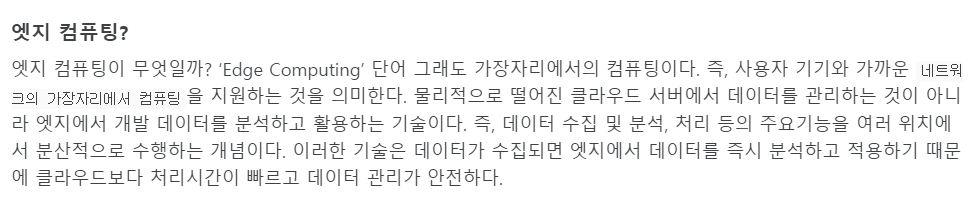

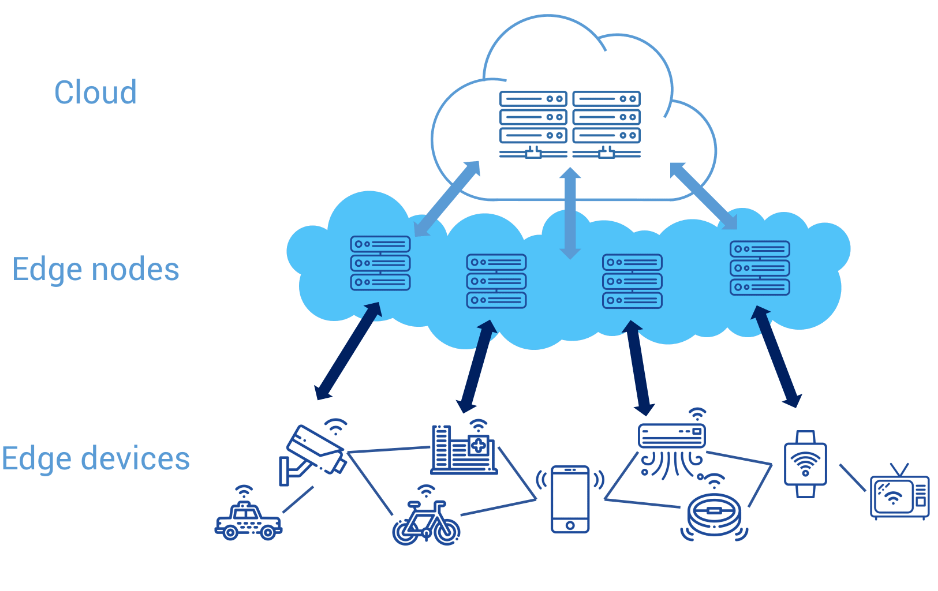

사용자가 이용하는 디바이스로 스펙이 다른 컴퓨터 보다 작은 애들

- 클라우드 컴퓨팅과 비교했을 때 실시간 데이터 처리를 지원함

- 클라우드 컴퓨팅은 모든 데이터에 대해서 처리를 진행했지만 엣지 디바이스는 각자 맡은 부분만 하면 되어서 데이터 부하가 감소

- 클라우드 컴퓨팅은 모든 정보가 한 곳에 집중되어 해킹에 표적이 되기 쉽지만 애는 각자 정보를 나눠가지고 민감한 정보를 제외한 필요한 정보만 암호화하여 클라우드로 전송하여 보안성이 강함



- 딥러닝 모델은 여러 분야에서 다양하게 사용된다.
- 지금은 막대한 양의 데이터와 복잡한 테스크를 처리하기 위해 신경망이 커짐에 따라, 신경망의 계층과 파라미터가 많아지면서 계산 집약적인 기술들이 가능해지도록 하였다.


> 다른 파이프라인 논문에서 나온 계산 집약적인 기술이 여기 나옴
   - 계산 집약적 = 계산할 내용들이 많다, 집약되어있다 라고 생각하면 될 듯
   - 즉 다량의 연산이 필요한 문제들을 해결하는 것이 가능해졌따. 파라미터 량이 증가하면서

   

이러한 큰 규모의 심층 신경망이 한정적인 자원의 기기들에서 동작할 수 있을 뿐만아니라 러닝을 가속하기 위해 연합 학습(Federated Learning) 이라는 병렬처리 기법이 등장

- 데이터 병렬 처리
- 모델 병렬 처리
- 하이브리드 병렬 처리
- 파이프라인 병렬 처리

4가지 병렬 처리 방법에 대해 소개하고자 한다.


신경망의 계층과 파라미터 수가 증가함으로 써 딥러닝을 하나의 디바이스에서 학습하기에는 자원 부족 복잡한 계산으로 인해 예기치 않은 긴 학습시간 심지어 학습 실패등의 문제들을 겪음

- 분산학습의 경우 애초에 중앙에서 data를 각 device에 나누어주기 때문에 privacy에 관련하여 신경 쓸 것이 없습니다. 외부에 data가 노출되지만 않으면 됩니다.

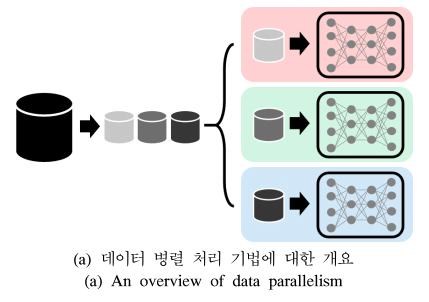

데이터 병렬 처리

- 동일한 신경망을 여러 디바이스에 복제하고 전체 학습 데이터를 나누어 각각의 디바이스는 문할된 데이터에 대한 학습을 진행한다.



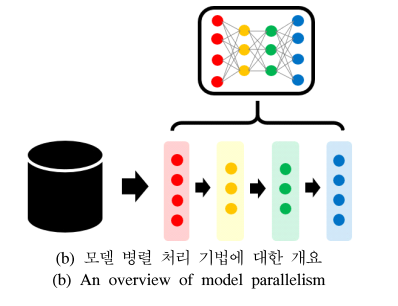

모델 병렬 처리
- 학습 모델을 분할하여 디바이스가 모델의 일부분을 가지고 학습을 진행하는 방법이다


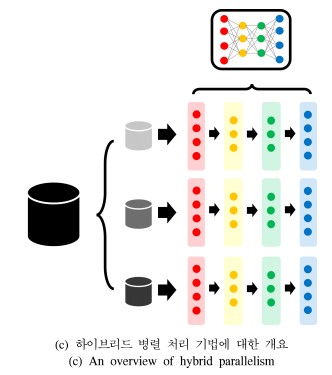

- 그 외에도 이 두 가지 기법을 사용한 하이브리드 병렬 처리 기법이 제안됨

하지만 이러한 기존의 방식들은 여전히 지나치게
발생하는 통신 오버헤드(Overhead) 또는 자원 저활용
(Under-utilization)의 문제를 겪고 있다

이러한 문제점을 해결하기 위해서 여러 디바이스에서 일을 동시에 처리하는 파이프라인 병렬 처리 기법이 나왔고 그로 인해 빠른 학습이 가능해짐

- 기존에는 학습 데이터를 순차적으로 주입하여 이전 데이터의 역전파로 모델이 학습된 후 다음 학습 데이터를 사용하여 수전파를 진행

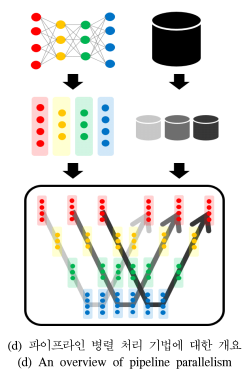

여러 대의 디바이스가 신경망 일부를 맡고 이전 데이터의 역전파가 끝나기 전에 다음 데이터의 학습을 시작하여 여러 개의 배치 데이터가 동시에 학습되어 디바이스 활용도를 높임

일반적인 경우 대규모 딥러닝 모델의 학습을 가속할 경우 Data parallelism이나 Model parallelism을 사용하는데 이 두 방식의 구조에서 각 노드가 부분적인(Partial) 데이터 혹은 모델을 가지고 학습을 진행하기 때문에 일관성 있는 Global Parameter의 관리는 위해서는 각 노드로부터 계산된 중간 결과물 취합할 방법이 필요하다.

최근에는 Parameter server를 통한 Star Topology 방법을 대표적으로 사용하고 있는데 이 방법은 멀티 노드들이 parameter server에 Global parameter에 대한 조회 및 갱신 처리를 진행해야 하기 때문에 Global parameter 버전 관리를 위한 동기화 기법이 필요함

- 동기식 학습 방법은 빠른 Worker들이 느린 Worker들의 학습 속도에 맞추어 진행하여 Parameter server로부터는 항상 동일한 Global parameter를 동기화 받아 다음 학습 과정을 진행하는 방식 (PSGD)

- 비동기식은 worker들이 독립적으로 학습을 진행하여 동일하지 않은 Global Parameter를 동기화 받아서 다음 학습 과정을 진행하는 방식(PipeDream, Hogwild)

동기식의 경우 학습 정확도는 보장할 수 있지만 학습 속도를 보장할 수 없고 비동기식의 경우 학습 정확도를 보장할 수 없지만 학습 속도를 보장할 수 있다는 trade off가 발생

## 데이터 병렬 처리 기법

각 디바이스가 다르분 부분 데이터를 같은 학습 모델로 이용하여 학습하도록 진행

- 손실함수 값을 최소화하는 것이 중요한데 이를 위해 데이터 병렬 처리에서는 데이터 일부를 이용하여 손실함수의 경사도를 구하는 SGD를 사용

- 데이터 양은 늘어나는데 처리하는 용량이나 네트워크 대역폭은 여전히 부족함, 그래서 확률적 경사하강법보다 더 효율적인 분산형 데이터 분석 알고리즘이 더 필요하다고 생각하여
  - PSGD[12]에서는 병렬식 확률적 경사하강법(Parallel Stochastic Gradient Descent)을 제안하였다
  - 각 프로세서 에서 수행한 SGD 결과를 마스터 루틴에서 취합하여 평균을 구하는 방식
  - PSGD는 각 프로세서에서 매개변수의 로컬 사본에서 SGD를 실행한 후 마스터 루틴으로 솔루션을 집계

  

- PSGD는 병렬 방식의 기계 학습에 유리하며, 입출력(Input/Output, I/O) 응답속도와는 독립적인 알고리즘이므로, 특히, 맵리듀스(MapReduce) 구현에 적합하다.

- 이로 인해 장애 허용(Fault Tolerance)을 보장하고 용이한 프로그래밍(Programming)이 가능해졌다.

- 그러나 PSGD는 여전히 장애 허용을 위한 오버헤드(Overhead)가 전체 스루풋(Throughput)을 저하시킬 수 있을 뿐만 아니라, 반복적인 연산에 적합하지 않아 숫자 집약적인 데이터 분석에는 적절하지 않다는 맵리듀스의 내재된 한계점들을 극복하지 못한 알고리즘이라고 할 수 있다

또한 모든 프로세서가 작업을 끝내야만 다음 epoch으로 갈 수 있다. 이로인해 메모리 록킹(Memory Locking) 문제가 발생, 효율적인 메모리 사용이나 동기화가 어렵다.

- 전체 기울기 결과를 마스터 루틴에서 종합하여 평균을 내야하기 때문

###PSGD
- 각 프로세서는 매개변수의 로컬 사본에서 SGD를 실행한 다음 마스터 루틴으로 솔루션을 집계합니다.
  - 기존 SGD는 빠르지만 데이터 집합의 대표성을 가지지 못한다는 단점이 있어서 수렴이 어려웠음, 여기서는 그걸 해결하고자 각 배치들의 SGD를 평균내어 진행한 느낌
  - 모든 proecssor가 작업이 끝나기 전까지 다음 epoch을 진행하지 못한다는 단점이 존재
</br>

###Hogwild
- 메모리 잠금 및 동기화로 인한 성능 저하 문제 해결 목적
- 프로세서들이 공유 메모리에 엑세스하고 메모리의 개별 구성 요소를 동시에 업데이트하는 방법
  - gradient descent를 진행할 때 최신 상태를 반영하지 않기 때문에 스레드가 동시에 업데이트를 진행할 수 있다.
  - PSGD의 메모리 록킹 문제를 해결할 수 있지만 데이터가 희소한 경우에만 적절한 알고리즘
  
</br>

###MALT
- 기존 프레임워크의 장기 학습 작업을 가능하는 목적을 가짐
- 유연한 AP를 가진 데이터 병렬 간단한 기계 학습 프레임워크 제공



## 모델 병렬 처리

독립된 디바이스들에게 여러 개의 부분 모델로 분할하여 할당해, 동일한 학습 데이터 배치들을 사용해 순차적으로 학습을 진행하였다.

모델 병렬 처리
- 학습 모델을 분할하여 디바이스가 모델의 일부분을 가지고 학습을 진행하는 방법이다

- 딥러닝 모델의 연산을 여러디바이스들에게나누어 진행함으로써 엣지 디바이스의제한된저장공간의특성을 극복할 뿐만 아니라 연산오버헤드(Overhead)또한 감소시킬 수 있다.

### Megatron-LM

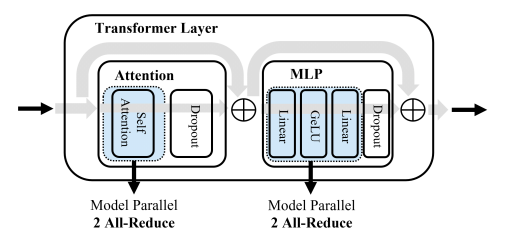

- 거대한 transformer 모델을 효과적으로 학습하기 위해 intra layer model parallelism을 이용한 방법

- 다층 퍼셉트론 블록은 결과 출력 간의 동기화 지점을 제거하여 통신을 요규하지 않고 직접 출력을 가져옴

- self attention block의 경우 행렬을 키, 쿼리, 값으로 분할하여 각 GPU에서 지역적으로(Locally) 처리하는 병렬 방식

- 위 사진과 같이 총 4개의 통신 오퍼레이션이 있는 forward pass, backward pass 전달 경로에서 두 개의 축소(All-Reduce)된 오퍼레이션만 사용하는 것이 가능함

- 통신 오버페드를 줄이며 GPU가 처리한 결과의 복사본을 사용해 파라미터를 정규화하여 추가적인 오류를 방지하기 때문에 대규모 모델을 학습할 수 있다.

- 새로운 컴파일러나 라이브러리 없이 쉽게 구현이 가능하다는 장점도 존재

단점

- 하지만 아직 optimizer의 효율성과 메모리 풋 프린트를 개선할 필요가 있다는 한계가 존재

기계 번역 정확도를 높이고자 전통적으로 Encoder - Decoder 방식을 사용했지만 인코더는 신경망 네트워크가 source 문장으로부터 모든 정보를 고정된 길이의 벡터로 압축하기 때문에 bottleneck 현상이 발생될 수 있다.

- 이러한 문제점을 해결하기 위한 방식윽이 GNMT

모델 파라미터를 스케줄링하는 프로그래밍 가능한 모델 병렬 처리시스템으로 학습을 빠르게 수렴하기 위해 어떤 파라미터들에 집중해 업데이트할지 우선순위를 정한다.

- STRADS 방식, 경량화 방식 중 prunning의 경우 모델의 가중치 중 일부 중요한 구조만 남겨두고 나머지는 0으로 만드는 기법이 존재, 이 방식에서도 중요한 구조의 가중치만 학습시키는 방법을 사용하는 것 같다.

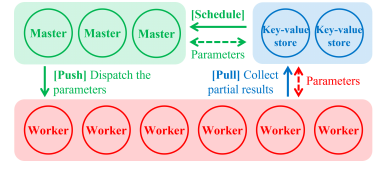

- STRADS의 시스템 인터페이스 구조

### PipeDream 이후 논문


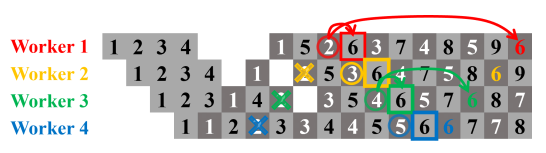

기존 pipedream의 경우 forward pass를 진행할 때는 최신 파라미터를 사용하지만 backward pass를 진행할 시점에서는 훨씬 이전의 파라미터이기 때문에 가중치 스케일니스 문제가 발생했었음

- 이러한 문제를 해결하고자 나온 것이 SpecTrain




> 연한 회색: forward pass

> 진한 회색: backward pass

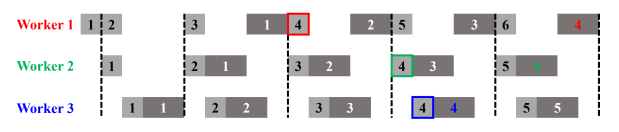

pipedream의 실제 기반 파라미터

- 4번으로 forward pass한 값을 기반으로 backward pass에서 업데이트할 경사도를 계산

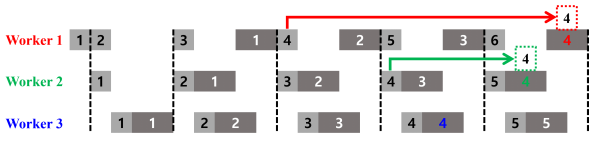

SpecTrain의 예측 기반 파라미터

- 현재 알고 있는 파라미터(4번)을 기반으로 backward pass가 진행될 때의 파라미터를 예측한다.

- 4번 backward pass를 할 때 4번 forward pass의 파라미터를 예측해서 진행

- 본 survey 논문에서 예측을 통한 작업 대부분에서 정확도 감소가 없었다고 한다.

SpecTrain의 경우 backward pss를 진행할 때 예측한 파라미터 값을 사용한다.

## 파이프드림 문제

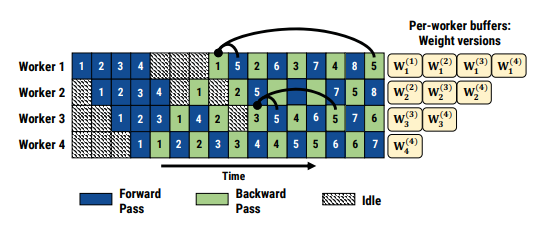

다음과 같이 각 worker마다 forward pass를 진행할 때 사용하는 backward pass로 업데이트 된 가중치가 다름

- 1번째에는 1번째 미니배치로 업데이트한 다음 5번째 미니배치 forward pass를 진행

- 2번째는 2번째 미니 배치를 사용한 다음 5번째 미니 배치에 대한 forward pass를 진행

- 서로 다른 가중치 버전을 사용했기 때문에 잘못된 그래디언트가 발생하고 (다음 학습때 그래디언트를 구하면 오류가 발생한다는 것 같음) 모델 수렴이 안될 위험이 있다.

- 솔루션으로 가중치 스태싱이라는 기술을 사용함 (가중치를 저장하여 보관한다는 것)

- 각 미니 배치에 대한



## 모델 병렬 처리 기법


확장성을 위하여 신경망을 독립된 디바이스들에게 여러 개의 부분 모델로 분할하여 할당해, 동일한 학습 데이터 배치들을 사용해 순차적으로 학습을 진행한다.


모델 병렬 처리 기법의 분산 딥러닝은 메모리가 제한적인 엣지 디바이스 환경에서도 확장이 가능하여 학습, 추론이 가능하다.

- 모델 연산을 여러 디바이스들에게 나누어 진행하여 엣지 디바이스의 제한된 저장공간의 특성을 극복할 뿐만 아니라 연산 오버헤드 또한 감소시킬 수 있다.



대규모 모델을 가속화하여 학습하기 위해 다수의 gpu, cpu에 모델을 분배해 병렬로 학습을 진행하는 방향으로 제시됨

- 자연어 처리, 기계 번역등 다양한 분야에서 사용됨

- 이 때 모델 병렬 처리에서는 모델의 파라미터들이 다른 기기들에게 분배되어 있고 주로 효율적인 병렬 처리를 위해 비동기적인 방식으로 파라미터를 업데이트 함

- 이때 여러 디바이스 상에 병렬로 처리함에 따라 최신 파라미터가 아닌 오래된 파라미터를 쓰게 되는 파라미터의 스케일니스(staleness) 문제나 학습 속도를 결정하는 중요 파라미터들을 판별하여 업데이트하는 문제들을 해결하기 위한 방법들이 제시됨

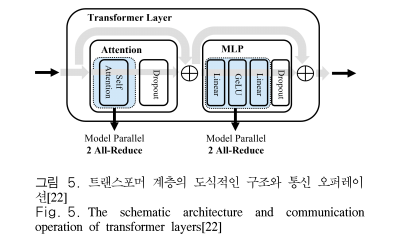

*Megatron-LM*는 자연어 처리 분야에서 초대형 모델을 학습시키기 위해 간단하면서도 효과적인 접근 방식을 제안

- 병렬 방식의 효율성을 최대화하고 GPU,간의 통신을 줄이기 위해 트랜스포머 네트워크를 사용

- 다층 퍼셉트론과 셀프 어텐션으로 구성되는데 다층 퍼셉은 결과 출력 간의 동기화 지점을 제거하여 통신을 유고하지 않고 직접 출력을 가져온다.

- 셀프 어첸션은 입력 행렬을 키, 쿼리, 값 으로 분할하여 각 gpu에서 지역적으로 처리하는 구조로 하는 병렬 방식이다.
  - 단순화된 두 개의 블록 접근 방식을 통해 모델 병렬식 처리를 하므로 총 4개의 오퍼레이션이 있는 전파 및 역전파 전달 경로에서 2개의 축소된 오페러이션만을 사용하는 것을 가능하게 한다.


또한 Megatron-LM는 통신 오버헤드를 줄이는 것 뿐만아니라 GPU가 처리한 결과의 복사본을 사용하여 파라미터를 정규화해 추가 오류를 방지하며 대규모 모델을 학습할 수 있다.

이 논문의 가장 큰 의의는 자연어 처리 영역에서 수십억 개의 파라미터가 있는 모델을 간단한 방법으로 학습할 수 있고 새로운 컴파일러나 랑이브러리 없이 구현이 가능하다.

- 하지만 아직 optimizer의 효율성과 메모리 풋 프린트(footprint)를 개선할 필요가 있다는 한계가 있다.



## 파이프라인 병렬 처리 기법

- 데이터 병렬처리
  - 모든 디바이스가 네트워크 모델의 완전 복사본을 가지고 있어야하기 때문에 큰 규모의 학습 모델에는 적합하지 않다.

- 모델 병렬 처리
   - 이 경우 큰 규모의 모델 학습에는 적합, 모델을 분할하기 때문 하지만 대부분의 경우 디바이스가 가동되지 않는 상태(Idle State)이기 때문에 자원 활용이 잘 안됨
   - 그 이유는 일반적인 학습에서 순전파, 역전파가 순서대로 처리되어야 하기 때문에 한 번에 한 디바이스만 학습에 참여하고 다른 디바이스는 본인이 맡은 모델의 차례가 올 때까지 기다려야하기 때문이다.
   - 또한 이전 데이터의 학습이 완료되기 전까지 다른 데이터가 학습을 시작할 수 없으므로 여러 대의 디바이스를 동시에 활용할 수 없다.



이러한 저활용 문제를 해결하기 위해 최근 연구에서 파이프라인 스케쥴링을 모델 병렬 처리 기법에 도입하였다.

- 각 디바이스가 자신이 맡은 부분에 대한 계산을 완료하면 바로 다음 분할 모델을 가지고 있는 디바이스에 계산 결과를 전달하고 본인은 다음 데이터에 대해 학습을 진행
  - 순차적으로 진행 각자 1레이어 씩 가지고 있어서 끝나면 아래로 넘기고 바로바로 작동하는 느낌?
  - 이렇게 여러 대의 디바이스가 동시에 학습을 진행할 수 있고 결과적으로 엄청난 속도 향상을 얻을 수 있다.
  - 그리고 모델을 분할하여 파이프라인 가속을 진행하기 떄문에 메모리를 효율적으로 관리할 수 있다. 이러한 파이프라인 병렬 처리 기법을 도입하기 위해서는 몇 가지 해결할 것들이 있다.

1. 먼저, 파이프라인스케줄은 각 디바이스에 어떤 분할 모델을할당해있는지에의해 결정된다.

2. 두 번째로, 일부 경우에서는 같은 뉴런에 대한 파라미터가 여러 개의버전(Version)이생기므로 어떻게 관리할지 또한 중요한요소이다.

3. 마지막으로 파이프라인 러닝을 진행하기 위해 가장 최신의 최적화된 파라미터를 쓰지 못하고 업데이트 이전의 예전 파라미터를 쓰게 되는 스테일니스 문제도 발생한다

GPipe는 여러 개의 배치를 동시에 처리하는 것이 아니라 하나의 배치를 분할하여 오버랩하는 방식이다.

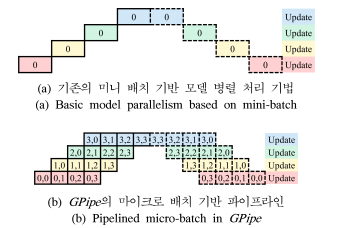

미니 배치를 아래와 같이 마이크로 배치로 쪼개어 가동되지 않는 상태를 줄이는 방식.

- 기존에는 한 챕처가 끝날 때 까지 기달렸지만 그 과정을 나누다 보니 끝나기 전에 나온 결과로 그 다음 과정을 진행할 수 있었다.

이렇게 마이크로 배치 분할을 통해 거의 선형 속도 증가를 얻을 수 있었으며 세세하게 분할 된 데이터를 사용함으로써 거대한 모델의 학습이 가능해졌다.

- 하지만 정확한 모델 분할(스테이지 분할)과 테스크 사이의 균형 없이는 속도 증진이 어렵다.

파이프 드림은 학습되는 데이터 순서를 역전하지 못한는 계층 단위의 forward pass와 backward pass로 인해 자원 저활용 문제가 발생한다는 것을 찾았고 해결하고자 여러 개의 배치를 중첩하여 워커가 가동되지 않는 상태를 줄이는 방법을 제안하였따.



계층 단위로 신경망을 분할한다.(그림 a) 그 다음 1-전방패스-1-후방전달 기반((One-Forward-One-Backward,
1F1B) 기반 작업 스케줄을 세운다. 이 스케줄은 각 계층을 맡은 디바이스가 그림 (b)와 같이 한번의 전방 전달과 한 번의 후방전달을 반복한다는 것을 의미한다.

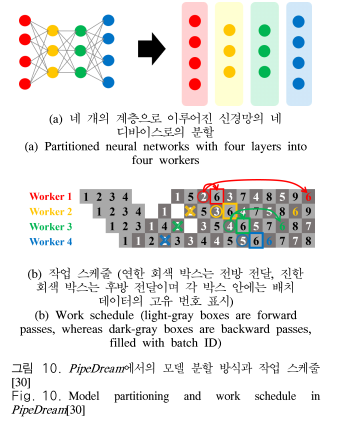

이를 통해 수렴 상태(Steady State) 이후에
는 모든 디바이스가 최대로 활용될 수 있다

- . 예를 들
어, 워커 2는 배치 2번의 후방 전달 후, 배치 5번의 전
방 전달, 배치 3번의 후방 전달, 그리고 배치 6번의 전
방 전달의 일련의 스케줄에 따라 일을 할 경우, 한 데
이터의 학습 라운드트립(Round-trip) 과정에서 역전될
일이 없이 계속해서 작업할 수있다

- 라운드 트립 = 인터넷 위에서 패킷을 보내고자 하는 측에서 패킷을 목적지에 보낼 때, 패킷이 목적지에 도달하고 나서 패킷에 대한 응답이 출발지로 돌아오는 것
  - 라운드 트립은 클라이언트와 서버간의 데이터 왕복
  - 이게 빈번하면 클라이언트와 서버간의 요청과 응답이 빈번하다는 이야기로 서버측의 성능에 그리 좋지 않은 결과를 준다는 이야기

하지만데이터병렬 처리와 비슷하게 다른 배치가다른디바이스에서 처리가 되고 있기 때문에, 파라미터를세세하게관리해야 한다.

- 일반적인 데이터병렬처리과정에서는이전 배치의 라운드트립이 끝난후에다음데이터가주입되기 때문에, 다음 데이터를학습할때는가장최신 업데이트된 파라미터를 사용할수있다. 즉, 배치2번의 학습이 끝나고 배치 3번의학습이시작될때는배치 2번으로 업데이트된 파라미터를쓸수있다는것이다

. 하지만 PipeDream에서는그림10(b)에서와같이 2번으로 업데이트된 파라미터를배치6번부터사용할 수 있게 된다.

- 순서를 바꿨기 때문

이를 위해서 가중치 스태킹을 통해 전체 배치 관점에서 끝난 배치의 파라미터를 사용하는 것이 아니라, 각 워커의 관점에서 최신 파라미터를 사용할 수 있게 하였다. 이때 가중치 스태킹을 통해 진행함

- ex) 배치6번을 학습하는데 모든 워커가 동일하게 배치 2번을 사용하는 것이 아니라, 워커 1은 배치 2, 워커 2는 배치 3 등 업데이트된 파라미터를 사용하여 최대한 최신 파라미터를 사용할 수 있게함


## 파이프 드림

DNN 교육은 forward pass와 backward pass를 통해 진행이 됨

각 반복에서 입력 데이터의 미니 배치를 처리하고 모델의 매개 변수에 대한 업데이트를 진행

- 현재 접근 방식은 walker set에서 optimizer 알고리즘의 각 반복을 병렬화 하는데 중점을 둠
  - 예를 들어 데이터 병렬 처리는 워커 간에 입력 데이터를 분활하고
  - 모델 병렬 처리는 작업자 간에 연산자(operator)를 분할하고 (모델을 분할했으니 연산들이 나눠줬다는 의미?)
  - 하이브리드 체계는 둘다 분할

안타깝게도 배치 내 병렬화(분산 학습)는 대규모 통신 비용이 높을 수 밖에 없습니다. (단일 노드 들로 분산하여 학습할 때 각 노드들이 서로 다른 값을 가지게 되어 이를 동기화하여 전역 파라미터를 업데이트 하는 과정이 필요한데 이 때문에 통신 오버헤드가 큼)

그림 1은 3가지 유형의 다중 GPU 서버에서 5가지 DNN 모델 간의 데이터 병렬화를 위한 통신 오버헤드를 보여줍니다.

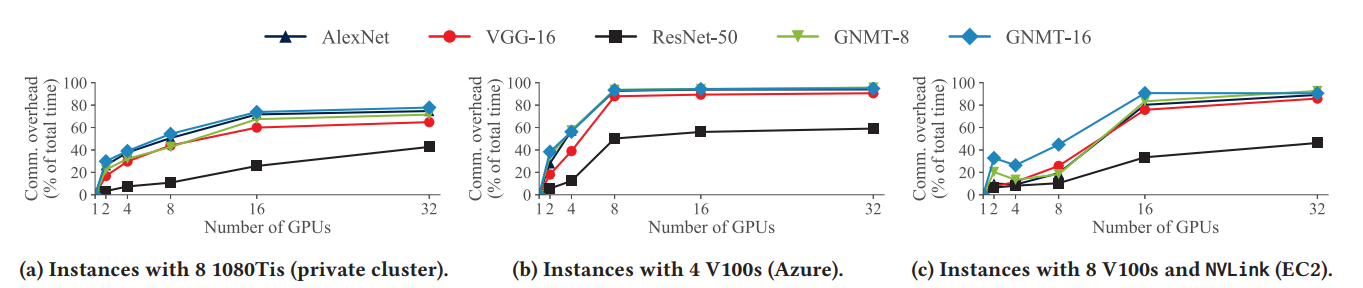

32개의 GPU에서 일부 모델의 통신 오버헤드(통신 중단에 소요된 총 시간의 백분율로 계산됨)는 비용이 많이 드는 서버 간 all_reduce 통신으로 90%에 이릅니다.

 - 즉 통신 오버헤드가 전체 학습 시간에 90%정도를 차지
 - 통신 오베헤드를 줄이면 학습 시간을 줄일 수 있다.

또한 시간이 지남에 따라 GPU 컴퓨팅 GPU compute capability(연산량)이 급격히 증가하면서 교육의 병목 현상이 모든 모델의 통신으로 이동해서 시간이 더 걸림



파이프드림은 사용 가능한 작업자 간에 모델을 나누고 연속적인 연사자(DNN layer, 연산자는 레이어라고 생각하면 됨)

각 레이어를 각 연산자(operator, 여러 GPU)에 할당한 다음 파이프라인 방식으로 다양한 입력의 계산 및 통신을 중첩합니다.(스테이지를 중첩해서 빨리 끝냄 = 파이프라인)

- 이 프로세스는 여러 gpu에게 할당된 모든 레이어 입출력(순전파는 액티베이션 맵, 역전파는 기울기)에 대한 통신을 제한하기 때문에 통신량을 줄임
- 이 통신은 피어 투 피어 방식 (중앙 서버를 거치지 않고 GPU끼리 직접 통신)
   - 서버로 직접가면 flash crowd가 발생할까바 이렇게 한건가?

파이프라인을 가득 채우고 높은 하드웨어 효율성을 달성하기 위해서 스케쥴링을 통해 모든 미니 배치를 파이프라인에 주입할 수 있지만 이 방법은 통계적 효율성이 낮고 고품질 모델을 생성하는데 필요한 데이터 세트의 number of pass 수가 증가(데이터 세트 훈련 횟수가 증가)
  - number of pass = forward pass, backward pass 수 증가 = 반복 횟수 증가

또한 이 전략은 기울기가 모든 교육 샘플에 대해 손실함수 전체 평균을 기준으로 업데이트가 진행되기 떄문에 원하는 정확도를 얻기 힘듬
  - 전체 데이터 집합으로 학습하는 경우 BGD(Batch Gredient decent)라고 하는데 이 방법은 계산량이 많고 모든 데이터의 평균으로 움직이기 때문에 큰폭으로 변하지 않고 안정적으로 이동한다.
  - 안정적으로 이동하기 때문에 로컬 미니멈에 빠질 위험이 높다 그러면 정확도가 안나옴

통계적 효율성(statistical efficiency)을 개선하기 위해 m 미니 배치의 하위 집합만 파이프라인에 주입하여 최근 Gpipe에서 제안한 대로 m 미니배치 마다 가중치 업데이트를 적용

- 하지만 이것은 빈번한 파이프라인 플러시로 인해 하드웨어 효율성 감소(예상했던 명령어를 비움)
> 왜 미니배치를 사용하면 파이프라인 플러시가 나올까?

파이프 드림은 steady state에서 파이프라인 중단 없이 높은 하드웨어 효율성과 높은 stacticaly efficency를 달성



서로다른 stage에서 실행되는 layer의 파이프라인이 주어지면 파이프드림 1번 forwardpass, 1번 backward pass 스케줄링 알고리즘을 사용하여 데이터 병렬 처리와 유사하게 하드웨어를 잘 활용하도록 유지



1F1B의 정상 상태에서 각 gpu는 자신의 stage에 대한 순방향 및 역방향 패스를 엄격하게 번갈아 가며 역방향 패스가 순방향 패스보다 더 오래 걸리는 일반적인 경우에도 높은 리소스 사용률(파이프라인 정지 무시, 파이프라인 플러시 없음)을 보장합니다.

- 1F1B는 또한 데이터 병렬 처리에 필적하는 통계적 효율성(효율)을 유지하기 위해 다양한 버전의 모델 가중치를 사용합니다.
  - 다양한 버전의 모델 가중치 사용 이유
  - https://blogs.nvidia.co.kr/2021/05/17/scaling-language-model-training-to-a-trillion-parameters-using-megatron/
    - 1F1B 사용 이유

### 1F1B사용 이유

서로 다른 gpu(레이어 별로 나눠서 stage)에서 연속적인 layer의 파이프 라인이 주어지면 파이프드림은 1F1B 스케줄링 알고리즘을 사용하는데 이건
- 몇 년간 대규모 언어 모델이 여러 NLP 데이터 세트로 few shot learning을 했다. 그 결과 모델이 기하급수적으로 성장했고 가장 큰 gpu에 있는 메인 메모리라도 모델 매개변수를 다 담지 못함
- GPT-3도 8개의 v100 gpu로 36년, 512개의 v100 gpu로는 7개월이 걸림

> https://nv-adlr.github.io/MegatronLM 여기서 텐서 모델 병렬 처링가 이러한 한계쩜을 어떻게 극복했는지 나옴

병렬처리는 200억개의 매개변수 크기의 모델에서는 적합했지만 더 큰 모델에서는 잘 작동하지 않음, 더 큰 모델은 여러 개의 DGX A100서버로 분할해야하는데 이 때 또 문제가 발생

- 텐서 모델 병렬처리에 필요한 올-리듀스 통신은 DGX A100 서버에서 사용할 수 있는 고대역폭 NVLink보다 느린 서버간의 링크를 거침 = 통신 오버헤드가 커짐? 하여튼 시간이 오래 걸림
- 모델 병렬처리 수준이 높으면 GEMM이 작아져 GPU 활용률이 축소

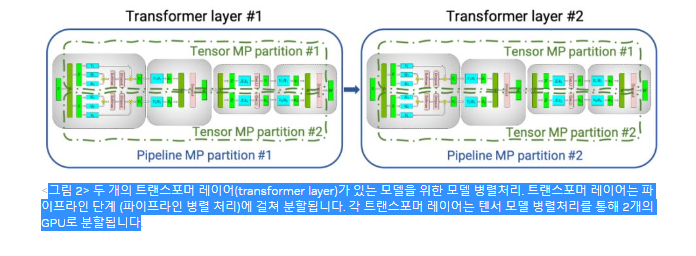

이러한 문제를 해결하기 위해 텐서 모델 병렬처리를 파이프라인 병렬 처리와 결합

- 파이프드림과 G파이프에서 사용했지만 현재 Deepspeed와 같은 시스템에서도 사용 가능




파이프라인 병렬 처리는 모델 레이어가 여러 장치로 분할 됨, 반복적인 트랜ㅌ스 포머 기반 모델에서 사용하면 각 장치에서는 트랜스포머 레이어가 동일한 수로 할당 됨

- 배치는 마이크로 배치오 나눔, 명령은 파이프라인으로 연결된 마이크로 배치를 거쳐 수행됨 바닐라 옵티마이저 시매틱스(vanilla optimizer semantics)를 유지하기 위해서 옵티마이저 단계가 장치간에 동기화 되도록 주기적으로 파이프라인 플러시를 적용, 모든 배치의 시작과 끝에는 장치가 유휴 상태로 머무는 시간이 있습니다. 이 유휴 시간을 파이프라인 버블(pipeline bubble)이라고 부르는데 이 유휴시간은 최대한 줄이는 게 좋지요.


- 여러 장치에서 마이크로배치를 순방향과 역방향으로 스케줄링(scheduling)하는 방법은 여러가지가 있는데요. 각 접근 방식은 파이프라인 버블 크기, 통신량, 메모리 풋프린트 면에서 각기 다른 장단점이 있습니다. 여기서는 두 가지 방식에 대해 설명하겠습니다.

*기본 스케줄*

GPipe는 배치 안의 모든 마이크로 배치에 대해서 순방향 패스로 먼저 진행한 이후 모든 마이크로 배치에 대해 역방향으로 진행하는 방식으로 스케줄리합니다.

- 이 방식은 배치 내의 모든 마이크로배치에 대해 저장된 중간 활성화(stashed intermediate activation) (또는 활성화 재계산을 사용하는 경우 각 파이프라인 단계에 대한 입력 활성화)가 필요하기 때문에 메모리 풋프린트가 틉니다.

- 배치 규모가 큰 경우에는 일반적인 파이프라인 버블 비용을 줄이는 노력이 필요한데 기본 스케줄은 메모리 풋프린트가 높아 실용성이 떨어집니다.

- 메모리 풋프린트는 메모리 사용량, 모든 forward pass 결과물을 들고 있어서 큰가?

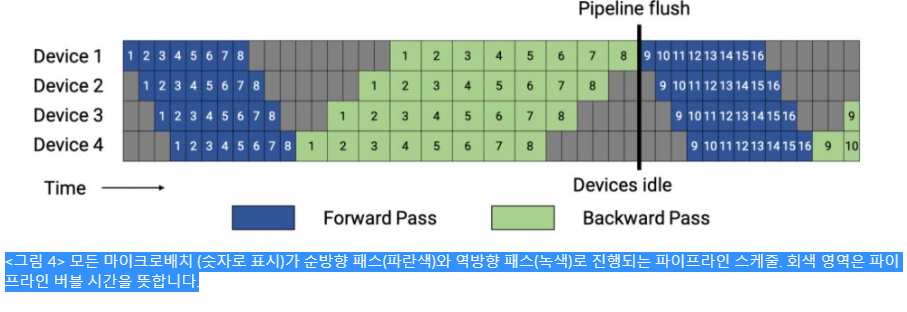

에서는 단순하게 역방향 패스가 순방향 패스보다 시간이 두 배 더 오래 걸린다고 가정했습니다(wgrad, dgrad). 파이프라인 스케줄의 효율성은 이 비율과는 상관없습니다. 위 예시에 나온 각 배치는 8개의 마이크로배치로 구성되며 각 상자에 붙여진 번호는 마이크로배치에 부여된 고유 식별번호입니다. 옵티마이저는 단계적으로 진행되고 파이프라인 플러시에서 가중치(weight) 매개변수가 업데이트됩니다.

*PipeDraem Flush*

먼저 워밍업 단계로 시작됩니다(그림 5). 이 스케줄에서는 인-플라이트(in-flight) 마이크로배치의 개수(역방향 패스가 진행중이고 활성화가 유지돼야 하는 상황에서의 마이크로배치 개수)가 배치 안의 마이크로배치 개수에 연동되는 것이 아니라 파이프라인 깊이에 따라 연동됩니다. 워밍업 단계를 마치면 작업자는 한번은 순방향 패스를, 그 다음 한번은 역방향 패스(1F1B)를 하는 일반적인 상태로 넘어갑니다. 마지막으로, 배치를 끝낼 때 남은 모든 인-플라이트 마이크로 배치는 역방향 패스로 완료됩니다


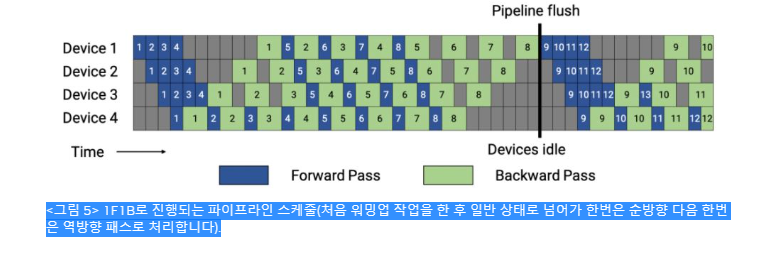

배치 안의 마이크로배치의 개수를 m, 파이프라인 단계 개수 p, 반복 당 이상적인 시간을 tid라고 한다면

## 다시 본문

최대 처리량에서 파이프라인을 작동하려면 파이프라인의 처리량이 가장 느린 단계에서 병목 현상을 일으키기 때문에 파이프라인의 모든 단계에 거의 동일한 시간이 소요되어야 합니다.

- 동일한 시간이 소요되야 파이프라인 효과가 더 좋음

PipeDream은 단일 GPU에서 수행되는 짧은 프로파일링 실행을 기반으로 DNN의 연산자를 분할하는 방법을 자동으로 결정하여 대상 플랫폼에 대한 통신을 최소화하면서 여러 단계 간에 계산 부하의 균형을 맞춥니다.

DNN은 사용 가능한 작업자 간에 항상 균등하게 분할되지 않으므로 PipeDream은 일부 단계에 대해 데이터 병렬 처리를 사용하기로 결정할 수 있습니다. 여러 작업자가 주어진 단계에 할당되어 서로 다른 미니 배치를 병렬로 처리할 수 있습니다.

## 속도

파이프 드림의 시간적 이점은 데이터 병렬 교육과 비교할 때

이미지 작업의 경우 최대 5.3배, 기계번역 3.1배, 언어 모델링 작업의 경우 4.3배, 3배 빠른 다중 GPU머신에서 높은 목표 정확도에 도달합니다.

비디오 캡션 모델의 경우 모델 병렬처리보다 2.6배 ~ 15배, 하이브리드 병렬보다 최대 1.9배 빠르며, GPipe접근 방식과 같은 단순 파이프 라이닝 보다 1.7배 빠름